In [1]:
import sklearn.datasets
import sklearn.metrics
from sklearn.utils.validation import check_is_fitted

import autosklearn.regression
import matplotlib.pyplot as plt
from autosklearn.metrics import r2, mean_squared_error
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

In [2]:
X, y = sklearn.datasets.load_diabetes(return_X_y=True)

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    X, y, random_state=1
)

In [3]:
automl = autosklearn.regression.AutoSklearnRegressor(
    time_left_for_this_task=120,
    per_run_time_limit=20,
    metric = mean_squared_error,
    ensemble_kwargs = {'ensemble_size': 1},
    seed = 42
)
automl.fit(X_train, y_train, X_test, y_test, dataset_name="diabetes")

AutoSklearnRegressor(ensemble_class=<class 'autosklearn.ensembles.ensemble_selection.EnsembleSelection'>,
                     ensemble_kwargs={'ensemble_size': 1},
                     metric=mean_squared_error, per_run_time_limit=20, seed=42,
                     time_left_for_this_task=120)

In [4]:
train_predictions = automl.predict(X_train)
print("Train MSE:", sklearn.metrics.mean_squared_error(y_train, train_predictions))
test_predictions = automl.predict(X_test)
print("Test MSE:", sklearn.metrics.mean_squared_error(y_test, test_predictions))

Train MSE: 2818.5945386007616
Test MSE: 3033.870417581635


In [5]:
pot = automl.performance_over_time_

In [6]:
pot

,Timestamp,ensemble_optimization_score,ensemble_test_score,single_best_optimization_score,single_best_train_score,single_best_test_score
38,2022-10-24 14:02:11.000000,NaN,NaN,3124.737053,456.107946,4071.382489
0,2022-10-24 14:02:11.751302,3124.737053,4071.382489,3124.737053,456.107946,4071.382489
58,2022-10-24 14:02:36.000000,3124.737053,4071.382489,2742.175477,2305.821584,3326.742538
8,2022-10-24 14:02:36.936868,2742.175477,3326.742538,2742.175477,2305.821584,3326.742538
66,2022-10-24 14:02:58.000000,2742.175477,3326.742538,2594.385615,2930.191740,3033.870418
24,2022-10-24 14:02:58.122755,2594.385615,3033.870418,2594.385615,2930.191740,3033.870418


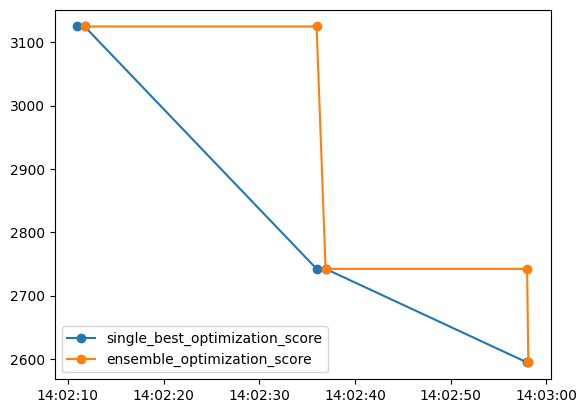

In [7]:
plt.plot(pot['Timestamp'], pot['single_best_optimization_score'], '-o', label = 'single_best_optimization_score')
plt.plot(pot['Timestamp'], pot['ensemble_optimization_score'], '-o', label = 'ensemble_optimization_score')
plt.legend()